# How things go wrong for a stochastic MJP model of gene expression

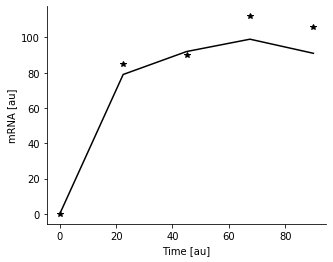

In [2]:
from study_abc_noise.model import MRNATranscription1dModelVars as ModelVars
import pyabc
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

n_t = 5
noise_model = 'poisson'
mv = ModelVars(n_t=n_t, noise_model=noise_model, noise_success_probability=0.7)

model = mv.get_model()
model_noisy = mv.get_model_noisy()
prior = mv.get_prior()

def get_data():
    try:
        data_nonoise, data = pickle.load(open(f"data_{noise_model}_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{noise_model}_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

distance = mv.get_distance()
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()
sampler = pyabc.sampler.RedisEvalParallelSampler(host="icb-mona", port=8775, batch_size=10)
#sampler = pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20)

fig, ax = plt.subplots()
ax.plot(data_nonoise['t'], data_nonoise['mrna'], '-', color='k')
ax.plot(data['t'], data['mrna'], '*', color='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches((5,4))
ax.set_xlabel("Time [au]")
ax.set_ylabel("mRNA [au]")

for fmt in ['svg', 'eps']:
    plt.savefig(f"data_{noise_model}.{fmt}", format=fmt)

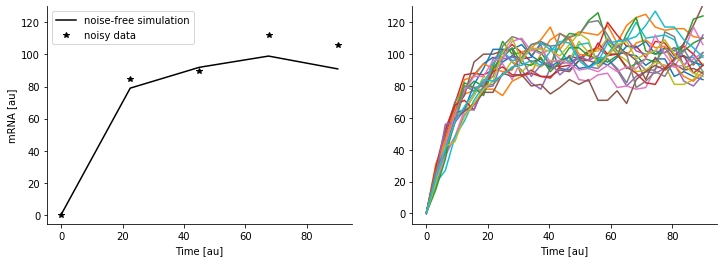

In [15]:
fig, arr_ax = plt.subplots(1,2)

ax = arr_ax[0]
ax.plot(data_nonoise['t'], data_nonoise['mrna'], '-', color='k', label="noise-free simulation")
ax.plot(data['t'], data['mrna'], '*', color='k', label="noisy data")
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Time [au]")
ax.set_ylabel("mRNA [au]")
ax.set_ylim(top=130)

ax = arr_ax[1]
_mv = ModelVars(n_t=30)
_model = _mv.get_model()
for _ in range(20):
    sim = _model(mv.p_true)
    ax.plot(sim['t'], sim['mrna'], '-')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(top=130)

ax.set_xlabel("Time [au]")
ax.set_ylabel(None)

fig.set_size_inches((12,4))

for fmt in ['svg', 'eps']:
    plt.savefig(f"data_and_model_trajectories_{noise_model}_{n_t}.{fmt}", format=fmt)

In [63]:
abc = pyabc.ABCSMC(model, prior, distance, sampler=sampler, population_size=1000)
abc.new(f"sqlite:///h_incorrect_{noise_model}.db", data)
abc.run(max_nr_populations=18)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 23:14:33.106586, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 22051.999999999964
INFO:ABC:t: 0, eps: 22051.999999999964.
INFO:ABC:Acceptance rate: 1000 / 3830 = 2.6110e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 6143.999999999998.
INFO:ABC:Acceptance rate: 1000 / 3970 = 2.5189e-01, ESS=9.9825e+02.
INFO:ABC:t: 2, eps: 1984.6114830460888.
INFO:ABC:Acceptance rate: 1000 / 4070 = 2.4570e-01, ESS=9.9736e+02.
INFO:ABC:t: 3, eps: 980.9026087622989.
INFO:ABC:Acceptance rate: 1000 / 4320 = 2.3148e-01, ESS=9.6346e+02.
INFO:ABC:t: 4, eps: 585.0.
INFO:ABC:Acceptance rate: 1000 / 5050 = 1.9802e-01, ESS=8.8382e+02.
INFO:ABC:t: 5, eps: 380.5519518105277.
INFO:ABC:Acceptance rate: 1000 / 7420 = 1.3477e-01, ESS=7.6548e+02.
INFO:ABC:t: 6, eps: 263.0.
INFO:ABC:Acceptance rate: 1000 / 11360 = 8.8028e-02, ESS=8.5083e+02.
INFO:ABC:t: 7, eps: 178.0.
INFO:ABC:Acceptance rate: 1000 / 18930 = 5.2826e-02, ESS=1.9969e+0

KeyboardInterrupt: 

In [62]:
abc = pyabc.ABCSMC(model, prior, distance, sampler=sampler, population_size=1000)
abc.new(f"sqlite:///h_incorrect_{noise_model}_exactdata.db", data_nonoise)
abc.run(max_nr_populations=14)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 22:56:38.649690, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 21857.49999999999
INFO:ABC:t: 0, eps: 21857.49999999999.
INFO:ABC:Acceptance rate: 1000 / 2940 = 3.4014e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 5472.999999999995.
INFO:ABC:Acceptance rate: 1000 / 3040 = 3.2895e-01, ESS=9.9906e+02.
INFO:ABC:t: 2, eps: 1579.7166857954055.
INFO:ABC:Acceptance rate: 1000 / 2990 = 3.3445e-01, ESS=9.9452e+02.
INFO:ABC:t: 3, eps: 633.0572446617907.
INFO:ABC:Acceptance rate: 1000 / 3200 = 3.1250e-01, ESS=9.6097e+02.
INFO:ABC:t: 4, eps: 366.0.
INFO:ABC:Acceptance rate: 1000 / 3950 = 2.5316e-01, ESS=7.8113e+02.
INFO:ABC:t: 5, eps: 233.87834310091336.
INFO:ABC:Acceptance rate: 1000 / 6140 = 1.6287e-01, ESS=7.9935e+02.
INFO:ABC:t: 6, eps: 143.93503274839438.
INFO:ABC:Acceptance rate: 1000 / 10700 = 9.3458e-02, ESS=7.0143e+02.
INFO:ABC:t: 7, eps: 94.0.
INFO:ABC:Acceptance rate: 1000 / 21120 = 4.7348e-02, ES

In [61]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor, population_size=1000)
abc.new(f"sqlite:///h_stochacc_{noise_model}.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 22:52:22.127444, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-1.3311e+01 for t=0.
INFO:ABC:t: 0, eps: 52.142446900809425.
DEBUG:Acceptor:Encountered pd=-1.3218e+01 > c=-1.3311e+01, thus weight=1.0018e+00.
DEBUG:Acceptor:Encountered pd=-1.3072e+01 > c=-1.3311e+01, thus weight=1.0046e+00.
DEBUG:Acceptor:Encountered pd=-1.2986e+01 > c=-1.3311e+01, thus weight=1.0062e+00.
DEBUG:Acceptor:Encountered pd=-1.3188e+01 > c=-1.3311e+01, thus weight=1.0024e+00.
DEBUG:Acceptor:Encountered pd=-1.3187e+01 > c=-1.3311e+01, thus weight=1.0024e+00.
INFO:ABC:Acceptance rate: 1000 / 3590 = 2.7855e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-1.2986e+01 for t=1.
INFO:ABC:t: 1, eps: 10.428778728438193.
DEBUG:Acceptor:Encountered pd=-1.2938e+01 > c=-1.2986e+01, thus weight=1.0046e+00.
DEBUG:Acceptor:Encountered pd=-1.2930e+01 > c=-1.2986e+01, thus weight=1.0054e+00.
INFO:ABC:Acceptance rate: 1000 / 3311 = 3.0202e-01, E

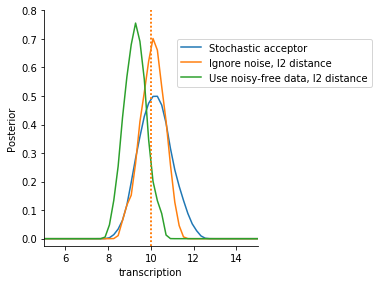

In [6]:
import pyabc
%matplotlib inline

def plot(h, x, ax, limits, p_true):
    for t in range(0, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    ax.legend()
    return ax

h_exact = pyabc.History(f"sqlite:///h_incorrect_{noise_model}_exactdata.db")
h_incorrect = pyabc.History(f"sqlite:///h_incorrect_{noise_model}.db")
h = pyabc.History(f"sqlite:///h_stochacc_{noise_model}.db")

for p in mv.p_true:
    fig, ax = plt.subplots()
    for h, label in [(h, "Stochastic acceptor"), (h_incorrect, "Ignore noise, l2 distance"), (h_exact, "Use noisy-free data, l2 distance")]:
        pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=5, xmax=15, ax=ax,
                                                 refval=mv.p_true, label=label)
    ax.legend(loc="upper left", bbox_to_anchor=(0.6,0.9))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.set_size_inches((5,4))
    fig.tight_layout()
    ax.set_ylim(top=0.8)
    for fmt in ['svg', 'eps']:
        plt.savefig(f"kde_1d_{p}_{noise_model}.{fmt}", format=fmt)
    
#for p in mv.p_true:
#    _, ax = plt.subplots()
#    plot(h_incorrect, p, ax, mv.limits, mv.p_true)
#    _, ax = plt.subplots()
#    plot(h, p, ax, mv.limits, mv.p_true)
#    ax.legend()

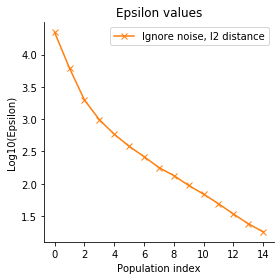

In [5]:
fig, ax = plt.subplots()
pyabc.visualization.plot_epsilons(h_incorrect, "Ignore noise, l2 distance", scale="log10", ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_lines()[-1].set_color('C1')
ax.legend()
fig.set_size_inches((4,4))
fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f'eps_{noise_model}.{fmt}', format=f'{fmt}')